In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/avakh/Desktop/sml_4_data/data/us_simplified_csv.csv")

In [3]:
df.head()

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region
0,2020-01-22,Autauga,Alabama,0,0,US
1,2020-01-23,Autauga,Alabama,0,0,US
2,2020-01-24,Autauga,Alabama,0,0,US
3,2020-01-25,Autauga,Alabama,0,0,US
4,2020-01-26,Autauga,Alabama,0,0,US


In [5]:
df1=df.loc[(df['Province/State'] =='California') & (df['Admin2'] =='Los Angeles')]

In [7]:
df2=df1[['Date','Confirmed']]
df3=df1[['Date','Deaths']]

In [8]:
df2.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)

In [9]:
df2.set_index('Date',inplace=True)
df3.set_index('Date',inplace=True)

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [12]:
model=sm.tsa.statespace.SARIMAX(df2['Confirmed'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\avakh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\avakh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\avakh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\avakh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
l1=results.predict(start=552,end=600,dynamic=True)

In [23]:
model1=sm.tsa.statespace.SARIMAX(df3['Deaths'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results1=model1.fit()

C:\Users\avakh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\avakh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [24]:
l2=results1.predict(start=552,end=600,dynamic=True)

In [25]:
l1.to_frame()
l2.to_frame()

,predicted_mean
2021-07-27,24647.419682
2021-07-28,24652.159152
2021-07-29,24655.702760
2021-07-30,24679.186844
2021-07-31,24685.472939
2021-08-01,24692.799366
2021-08-02,24702.724422
2021-08-03,24713.836056
2021-08-04,24721.884450
2021-08-05,24730.000099


In [26]:
frames = [df2, l1]
frames1 = [df3, l2]

In [27]:
result = pd.concat(frames)

<AxesSubplot:>

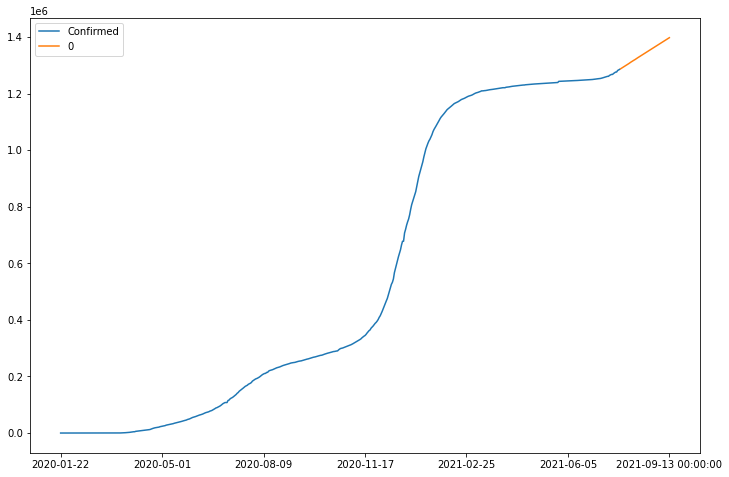

In [28]:
result[['Confirmed',0]].plot(figsize=(12,8))

In [29]:
result1 = pd.concat(frames1)

In [30]:
result1 

,Deaths,0
2020-01-22,0.0,NaN
2020-01-23,0.0,NaN
2020-01-24,0.0,NaN
2020-01-25,0.0,NaN
2020-01-26,0.0,NaN
...,...,...
2021-09-09 00:00:00,NaN,25122.363863
2021-09-10 00:00:00,NaN,25133.930865
2021-09-11 00:00:00,NaN,25144.836703
2021-09-12 00:00:00,NaN,25160.129765


<AxesSubplot:>

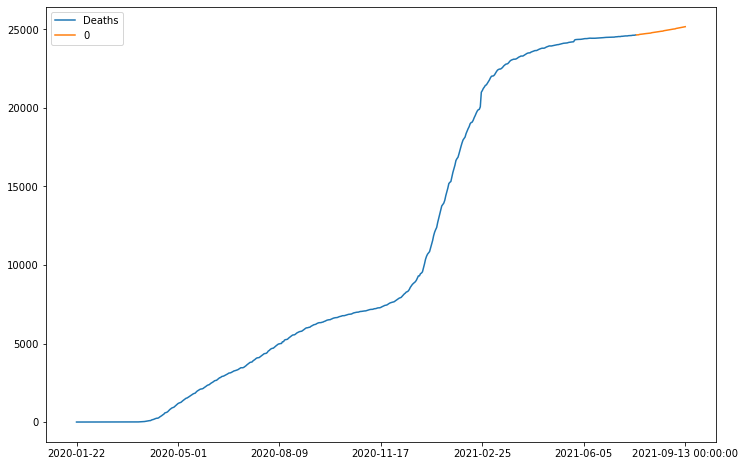

In [31]:
result1[['Deaths',0]].plot(figsize=(12,8))